In [123]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print train.columns
print test.columns

Index([u'Dates', u'Category', u'Descript', u'DayOfWeek', u'PdDistrict',
       u'Resolution', u'Address', u'X', u'Y'],
      dtype='object')
Index([u'Id', u'Dates', u'DayOfWeek', u'PdDistrict', u'Address', u'X', u'Y'], dtype='object')


The test data lacks the Category (obviously), Descript, and Resolution columns, so we probably shouldn't use those in training our model.

In [5]:
print len(train), '\n', train.count()
print len(test), '\n', test.count()

878049 
Dates         878049
Category      878049
Descript      878049
DayOfWeek     878049
PdDistrict    878049
Resolution    878049
Address       878049
X             878049
Y             878049
dtype: int64
884262 
Id            884262
Dates         884262
DayOfWeek     884262
PdDistrict    884262
Address       884262
X             884262
Y             884262
dtype: int64


There are no null values in both the train and test data!  This simplifies things for us quite a bit.

In [6]:
def compare_counts(series1, series2):
    s1 = series1.value_counts().sort_index()
    s2 = series2.value_counts().sort_index()

    max_len = s1.index.map(len).max()
    for i in range(len(s1)):
        print '{: <{fill}}\t{}\t{}'.format(s1.index[i], s1[i], s2[i], fill=max_len)       

compare_counts(train.PdDistrict, test.PdDistrict)
print
compare_counts(train.DayOfWeek, test.DayOfWeek)

BAYVIEW   	89431	89591
CENTRAL   	85460	86130
INGLESIDE 	78845	80084
MISSION   	119908	120449
NORTHERN  	105296	107017
PARK      	49313	50199
RICHMOND  	45209	44972
SOUTHERN  	157182	157456
TARAVAL   	65596	66617
TENDERLOIN	81809	81747

Friday   	133734	134703
Monday   	121584	122226
Saturday 	126810	127038
Sunday   	116707	116415
Thursday 	125038	126541
Tuesday  	124965	126940
Wednesday	129211	130399


It looks like the train data is pretty representative of the test data, at least in the district and day of week breakdowns.

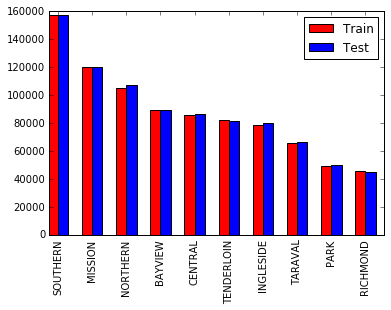

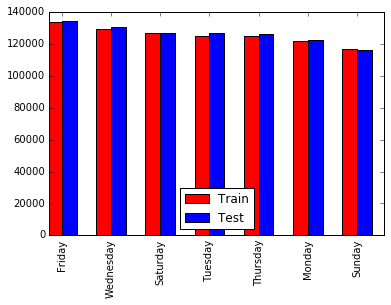

In [7]:
train.PdDistrict.value_counts().plot(kind='bar', position=1, color='r', width=0.3, align='center')
test.PdDistrict.value_counts().plot(kind='bar', position=0, color='b', width=0.3, align='center')
plt.legend(['Train', 'Test'])

plt.figure()
train.DayOfWeek.value_counts().plot(kind='bar', position=1, color='r', width=0.3, align='center')
test.DayOfWeek.value_counts().plot(kind='bar', position=0, color='b', width=0.3, align='center')
plt.legend(['Train', 'Test'], loc='best')

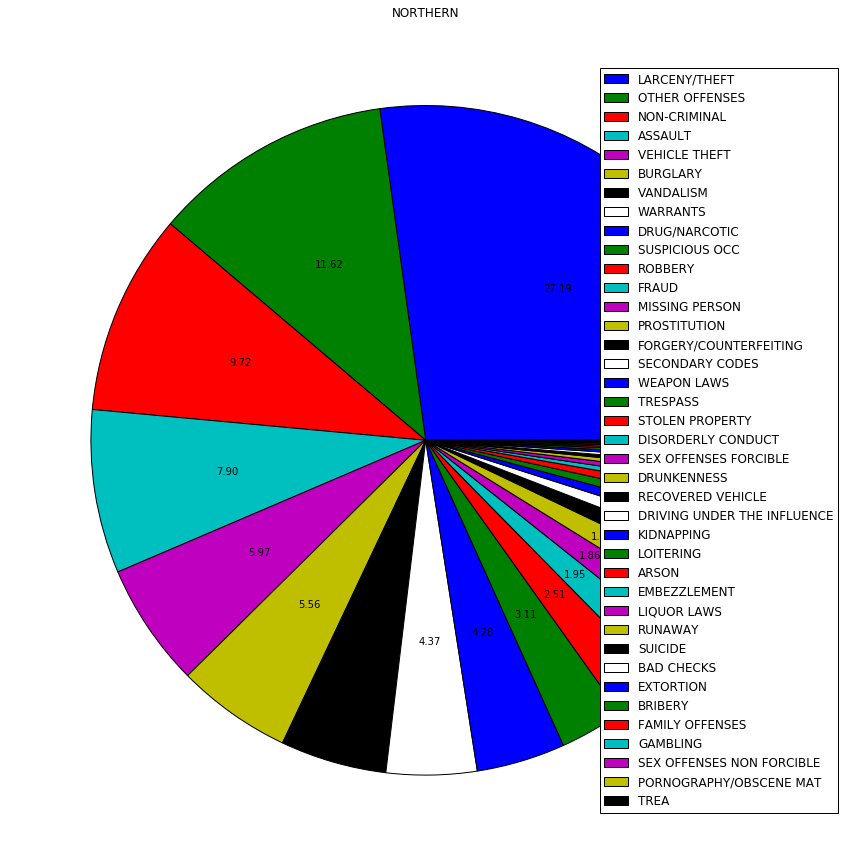

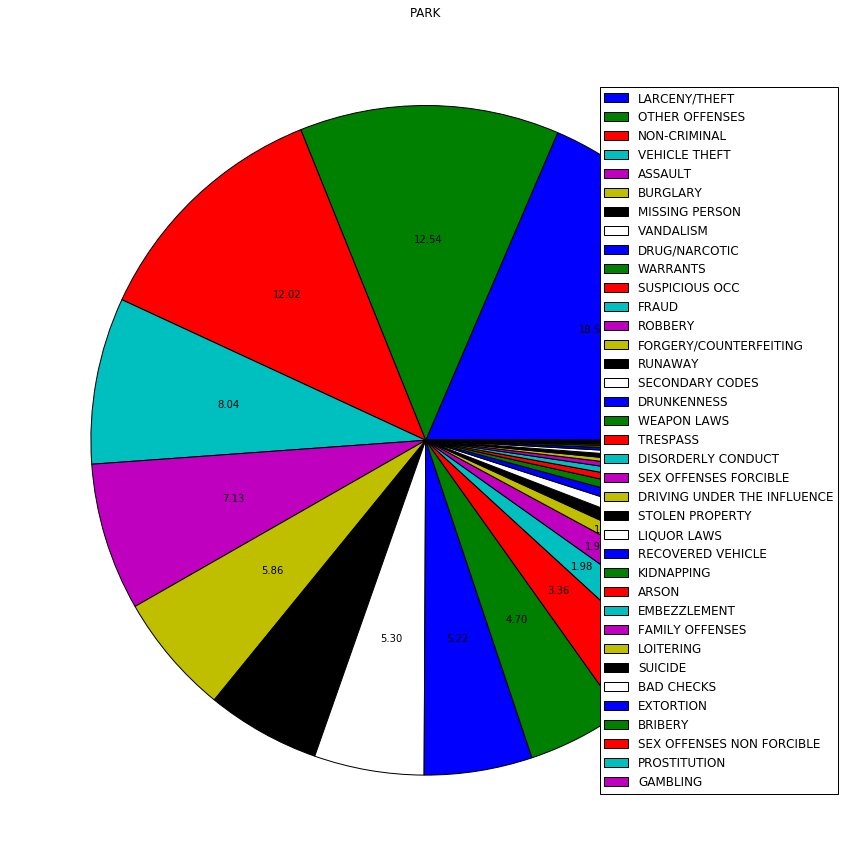

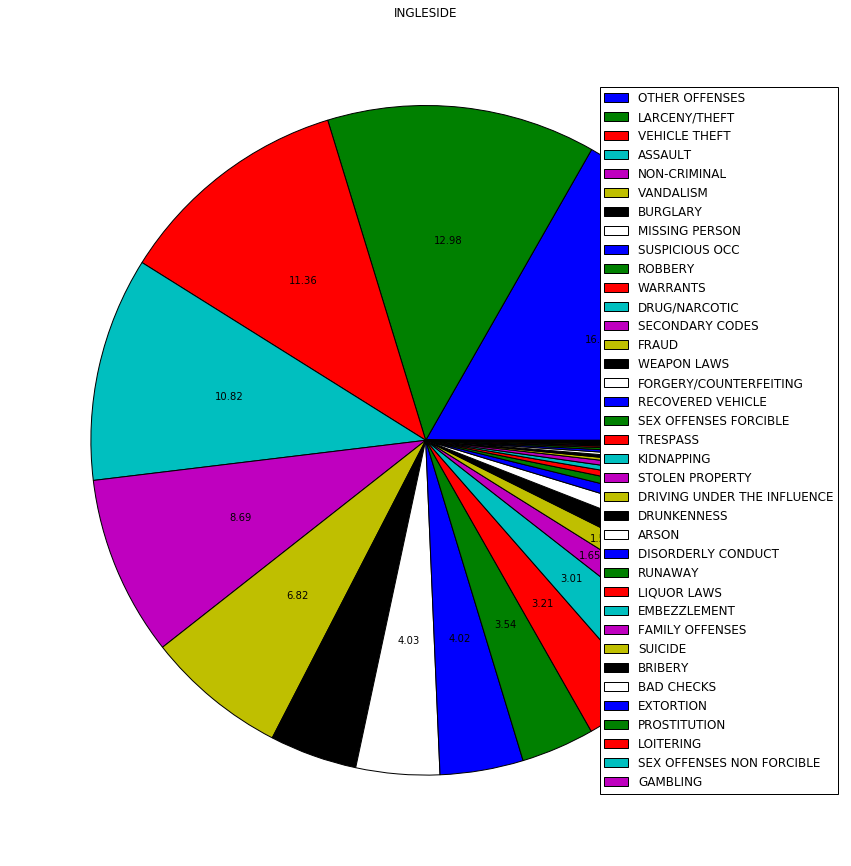

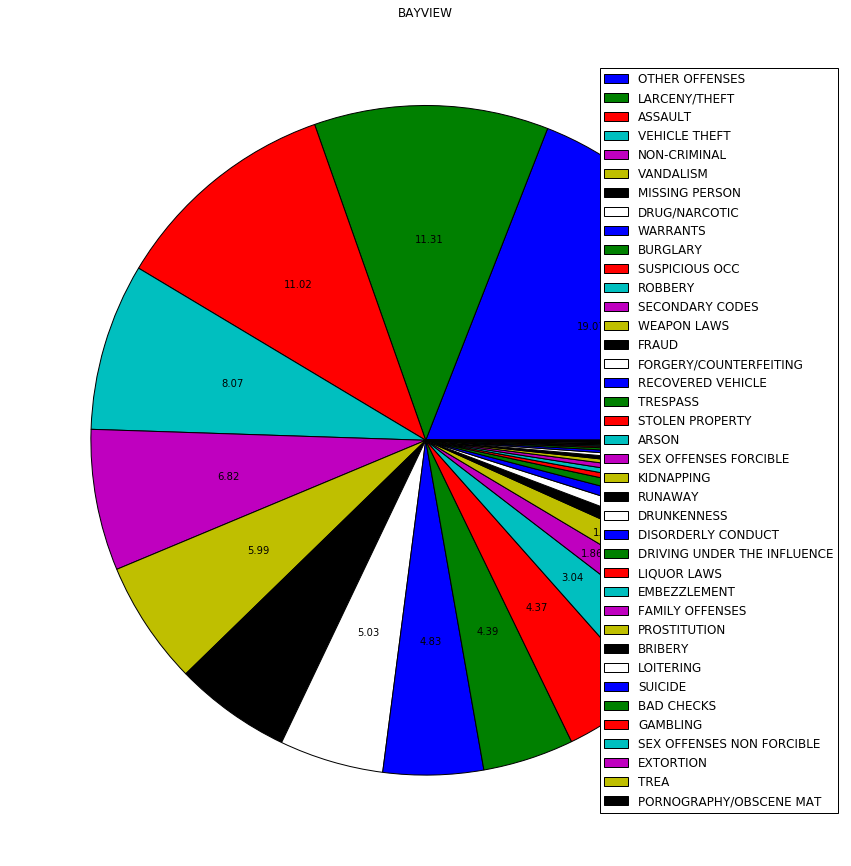

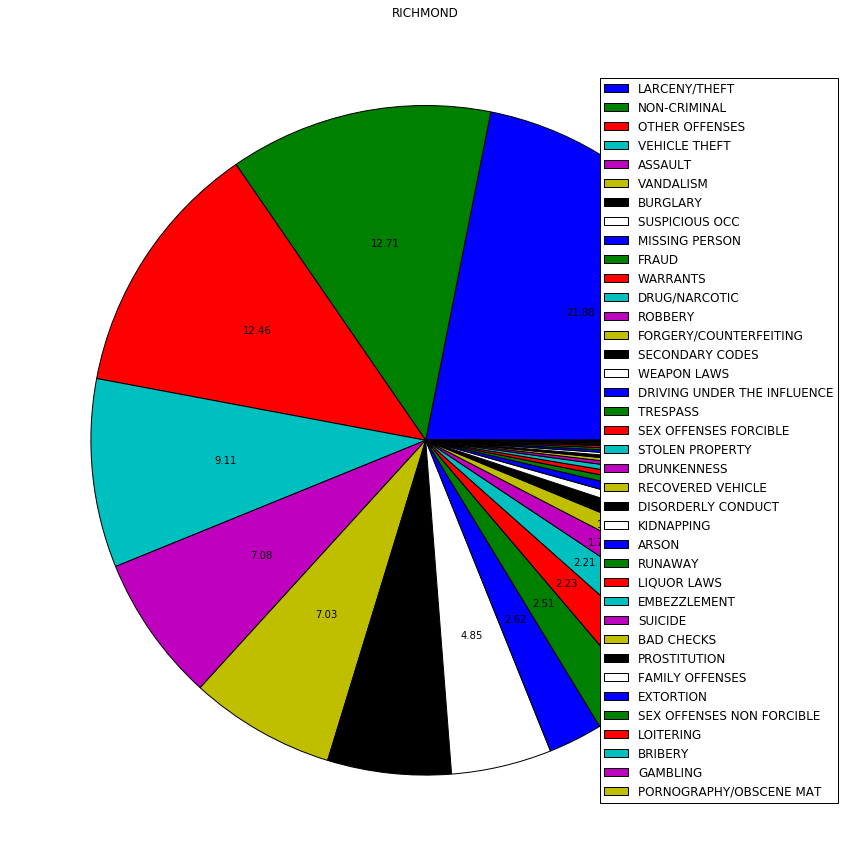

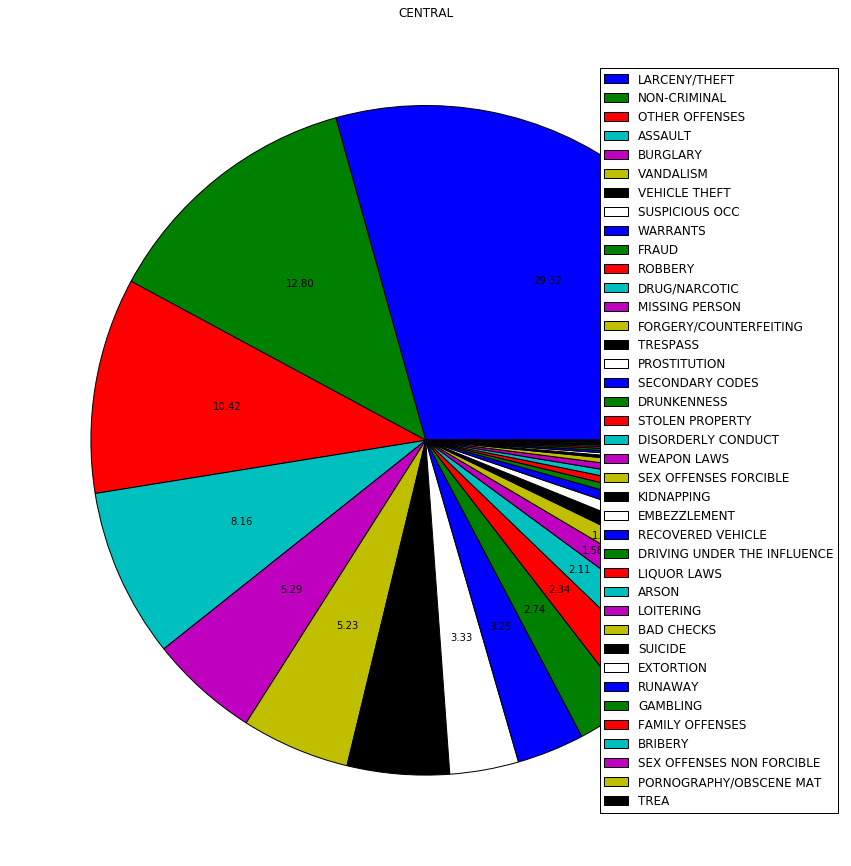

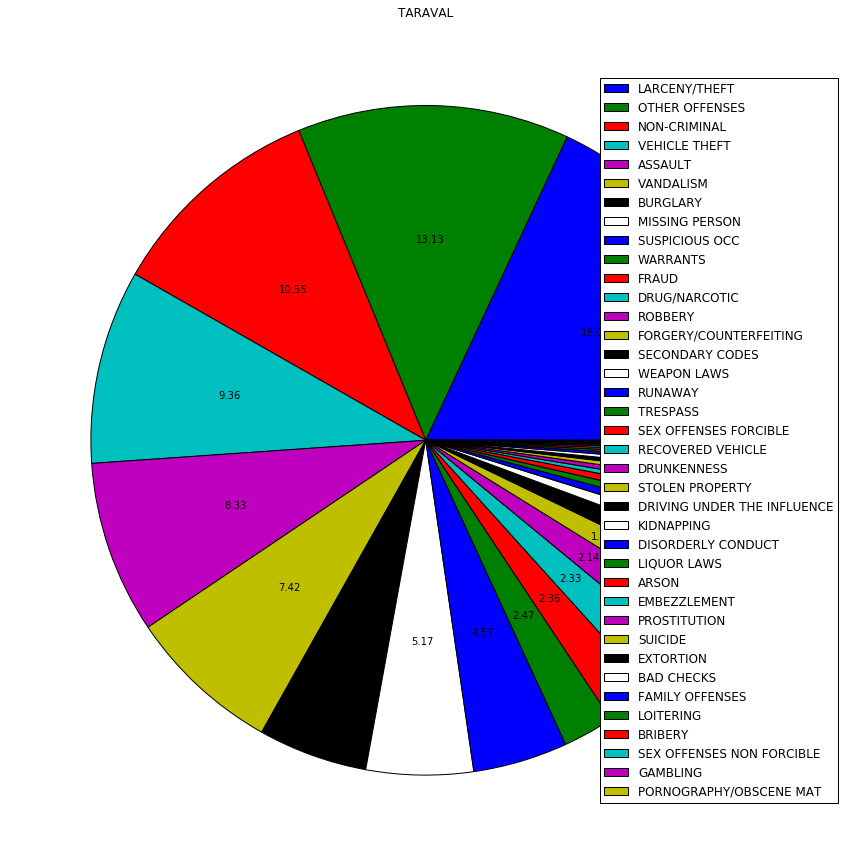

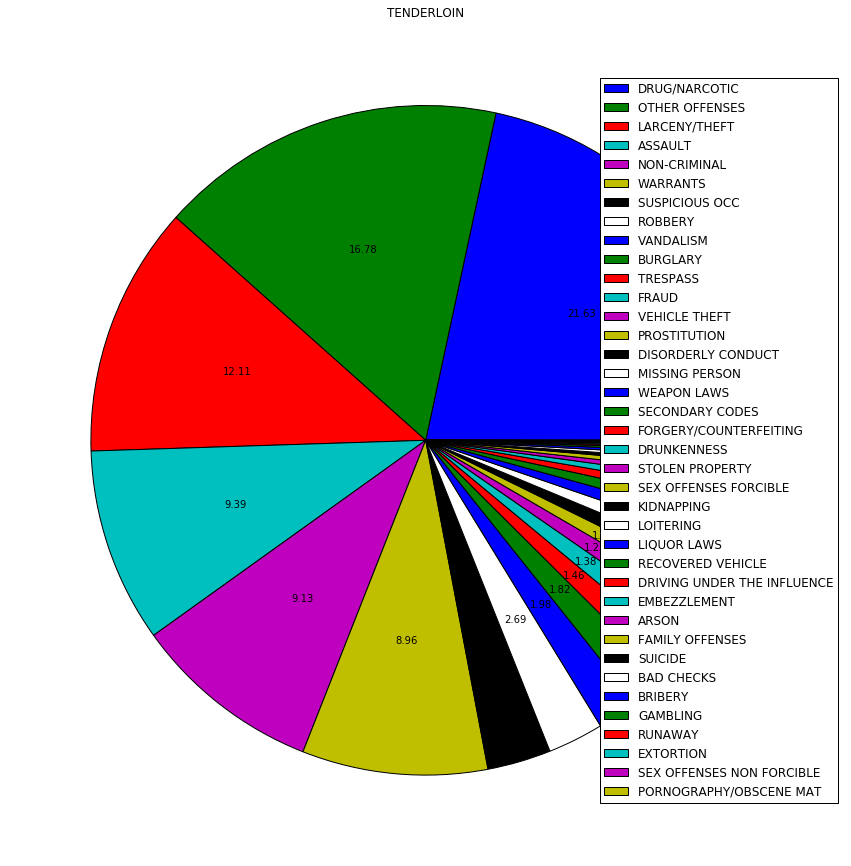

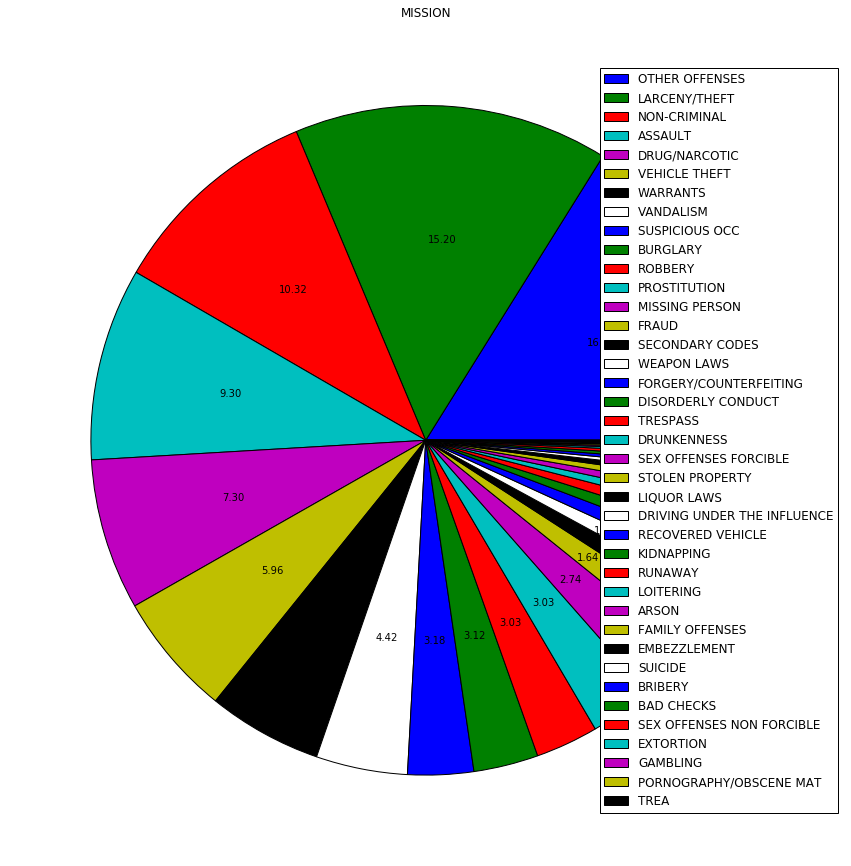

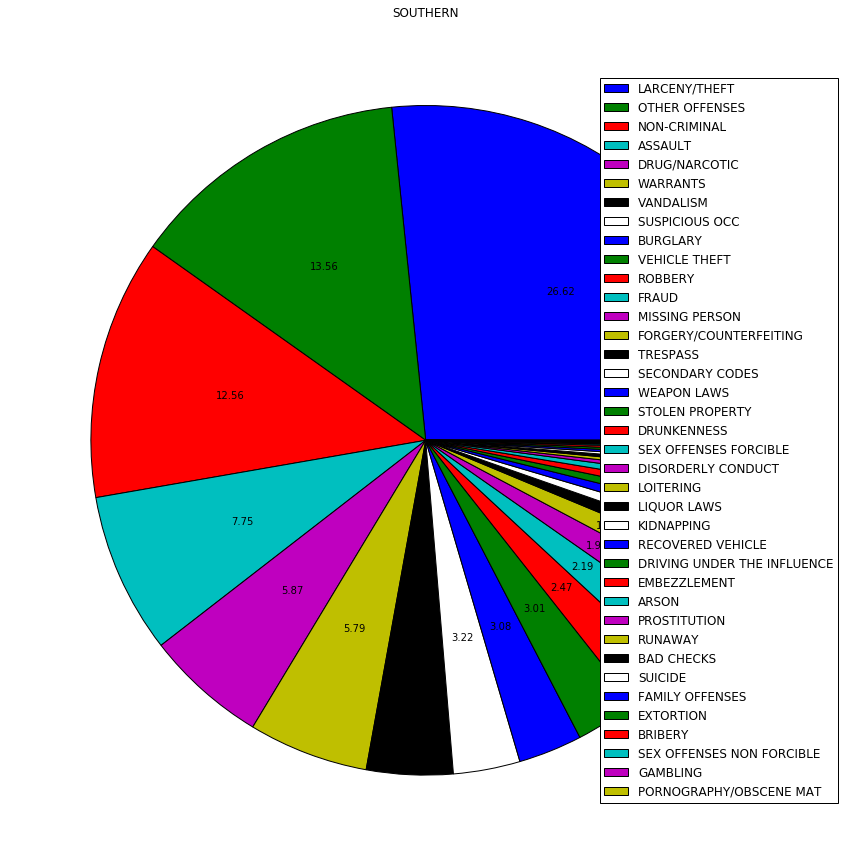

In [143]:
for pdd in train.PdDistrict.unique():
    cats = train.Category[train.PdDistrict == pdd].value_counts()
    plt.figure(figsize=(15,15))
    plt.pie(cats, autopct='%.2f')
    plt.title(pdd)
    plt.legend(cats.index, loc='right')

It looks like the category breakdown can vary quite a bit from district to district.  On a side note, I wish there was a better way to show these pie charts; I can't get the legend out of the way and the color mapping changes from chart to chart.

In [151]:
# Following code adapted from https://www.kaggle.com/dbennett/sf-crime/test-map

# Supplied map bounding box:
#    ll.lon     ll.lat   ur.lon     ur.lat
#    -122.52469 37.69862 -122.33663 37.82986
mapdata = np.loadtxt('sf_map_copyright_openstreetmap_contributors.txt')
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]

def plotOnMap(df, fig=True, color='b'):
    """
    Plot the given data frame on the map
    For some reason, the two 'if fig' statements can't be combined
    """
    if fig:
        f = plt.figure(figsize=(15,15))
    plt.scatter(df.X, df.Y, color=color)
    if fig:
        for ax in f.axes:
            ax.imshow(mapdata, cmap=plt.get_cmap('gray'), 
                      extent=lon_lat_box, 
                      aspect=asp)


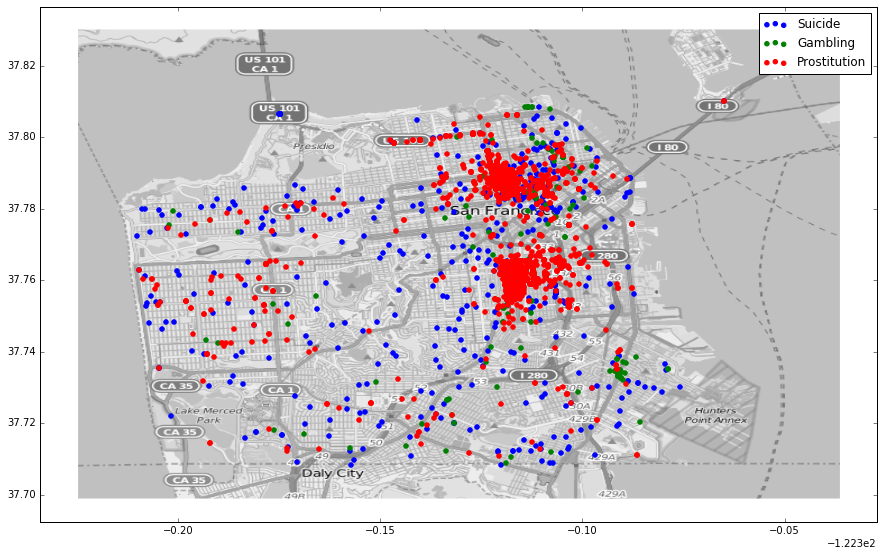

In [154]:
plotOnMap(train[train.Category == 'SUICIDE'], True, 'b')
plotOnMap(train[train.Category == 'GAMBLING'], False, 'g')
plotOnMap(train[train.Category == 'PROSTITUTION'], False, 'r')
plt.legend(['Suicide', 'Gambling', 'Prostitution'])